In [3]:
from textblob import TextBlob 
import tweepy
from config import API_KEY, API_SECRET_KEY, ACCESS_TOKEN, ACCESS_TOKEN_SECRET,BEARER_TOKEN
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import nltk
import re
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer


In [4]:

api_key = API_KEY
api_secret_key =  API_SECRET_KEY
access_token = ACCESS_TOKEN
access_token_secret = ACCESS_TOKEN_SECRET
bearer_token = BEARER_TOKEN
# authorization v1
auth = tweepy.OAuthHandler(api_key, api_secret_key)
auth.set_access_token(access_token, access_token_secret)

# access to api
api = tweepy.API(auth)


In [5]:
#Sentiment Analysis
def percentage(part,whole):
    return 100 * float(part)/float(whole)
keyword = ("#PyconKE")
noOfTweet = 1000
tweets = tweepy.Cursor(api.search_tweets, q=keyword).items(noOfTweet)
positive = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []
for tweet in tweets:
 
    #print(tweet.text)
    tweet_list.append(tweet.text)
    analysis = TextBlob(tweet.text)
    score = SentimentIntensityAnalyzer().polarity_scores(tweet.text)
    neg = score["neg"]
    neu = score["neu"]
    pos = score["pos"]
    comp = score["compound"]
    polarity += analysis.sentiment.polarity

    if neg > pos:
        negative_list.append(tweet.text)
        negative += 1 
    elif pos > neg:
        positive_list.append(tweet.text)
        positive += 1
    elif pos == neg:
        neutral_list.append(tweet.text)
        neutral += 1
    
positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, ".1f")
negative = format(negative, ".1f")
neutral = format(neutral, ".1f")

#Number of Tweets (Total, Positive, Negative, Neutral)
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print("total number: ",len(tweet_list))
print("positive number: ",len(positive_list))
print("negative number: ", len(negative_list))
print("neutral number: ",len(neutral_list))


total number:  101
positive number:  36
negative number:  51
neutral number:  14


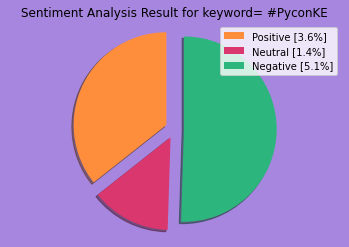

In [6]:
#Creating PieCart

# create a figure and set different background
fig = plt.figure()
fig.patch.set_facecolor('#a786df')

labels = ["Positive ["+str(positive)+"%]" , "Neutral ["+str(neutral)+"%]","Negative ["+str(negative)+"%]"]
sizes = [positive, neutral, negative]
colors = ["#ff8e3c", "#d9376e","#2cb67d"]
explodeTuple = (0.1, 0.1, 0.1)
patches, texts = plt.pie(sizes, colors=colors, explode= explodeTuple, shadow=True, startangle=90)
plt.style.use("default")
plt.legend(labels)
plt.title("Sentiment Analysis Result for keyword= " + keyword + "" )
plt.axis("equal")
plt.show()

In [7]:
tweet_list.drop_duplicates(inplace = True)


In [8]:
#Cleaning Text (RT, Punctuation etc)
#Creating new dataframe and new features
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]

In [9]:
#Removing RT, Punctuation etc

remove_rt = lambda x: re.sub('RT @\w+: '," ",x)
rt = lambda x: re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x)
tw_list["text"] = tw_list.text.map(remove_rt).map(rt)
tw_list["text"] = tw_list.text.str.lower()
tw_list.head(20)

,0,text
0,RT @TdevcommunityKe: We are 8 days to PyconKE ...,we are 8 days to pyconke 2022 i cannot keep c...
1,RT @arlemi: Very much looking forward to be in...,very much looking forward to be in nairobi ne...
2,We are 8 days to PyconKE 2022 I cannot keep ca...,we are 8 days to pyconke 2022 i cannot keep ca...
5,RT @Izhack: A good day to remind you that I st...,a good day to remind you that i still plug tr...
8,RT @ken_mbuki: I will be speaking about the st...,i will be speaking about the state importanc...
20,A good day to remind you that I still plug tra...,a good day to remind you that i still plug tra...
23,"I will be speaking about the state, importance...",i will be speaking about the state importance...
25,Very much looking forward to be in Nairobi nex...,very much looking forward to be in nairobi nex...
26,RT @TdevcommunityKe: We are 9 days to PyconKE ...,we are 9 days to pyconke 2022 i cannot keep c...
30,We are 9 days to PyconKE 2022 I cannot keep ca...,we are 9 days to pyconke 2022 i cannot keep ca...


In [10]:
#Calculating Negative, Positive, Neutral and Compound values
tw_list[["polarity", "subjectivity"]] = tw_list["text"].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tw_list["text"].iteritems():
 score = SentimentIntensityAnalyzer().polarity_scores(row)
 neg = score["neg"]
 neu = score["neu"]
 pos = score["pos"]
 comp = score["compound"]
 if neg > pos:
     tw_list.loc[index, "sentiment"] = "negative"
 elif pos > neg:
     tw_list.loc[index, "sentiment"] = "positive"
 else:
    tw_list.loc[index, "sentiment"] = "neutral"
    tw_list.loc[index, "neg"] = neg
    tw_list.loc[index, "neu"] = neu
    tw_list.loc[index, "pos"] = pos
    tw_list.loc[index, "compound"] = comp
tw_list.head(20)



,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,RT @TdevcommunityKe: We are 8 days to PyconKE ...,we are 8 days to pyconke 2022 i cannot keep c...,0.300000,0.750000,negative,NaN,NaN,NaN,NaN
1,RT @arlemi: Very much looking forward to be in...,very much looking forward to be in nairobi ne...,0.170000,0.197778,positive,NaN,NaN,NaN,NaN
2,We are 8 days to PyconKE 2022 I cannot keep ca...,we are 8 days to pyconke 2022 i cannot keep ca...,0.300000,0.750000,negative,NaN,NaN,NaN,NaN
5,RT @Izhack: A good day to remind you that I st...,a good day to remind you that i still plug tr...,0.700000,0.600000,positive,NaN,NaN,NaN,NaN
8,RT @ken_mbuki: I will be speaking about the st...,i will be speaking about the state importanc...,0.000000,0.000000,positive,NaN,NaN,NaN,NaN
20,A good day to remind you that I still plug tra...,a good day to remind you that i still plug tra...,0.700000,0.600000,positive,NaN,NaN,NaN,NaN
23,"I will be speaking about the state, importance...",i will be speaking about the state importance...,0.000000,0.000000,positive,NaN,NaN,NaN,NaN
25,Very much looking forward to be in Nairobi nex...,very much looking forward to be in nairobi nex...,0.170000,0.197778,positive,NaN,NaN,NaN,NaN
26,RT @TdevcommunityKe: We are 9 days to PyconKE ...,we are 9 days to pyconke 2022 i cannot keep c...,0.300000,0.750000,negative,NaN,NaN,NaN,NaN
30,We are 9 days to PyconKE 2022 I cannot keep ca...,we are 9 days to pyconke 2022 i cannot keep ca...,0.300000,0.750000,negative,NaN,NaN,NaN,NaN


In [11]:
#Creating new data frames for all sentiments (positive, negative and neutral)
tw_list_negative = tw_list[tw_list["sentiment"]=="negative"]
tw_list_positive = tw_list[tw_list["sentiment"]=="positive"]
tw_list_neutral = tw_list[tw_list["sentiment"]=="neutral"]

In [12]:
def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=["Total","Percentage"])
 
#Count_values for sentiment
count_values_in_column(tw_list,"sentiment")

,Total,Percentage
positive,18,40.00
negative,16,35.56
neutral,11,24.44


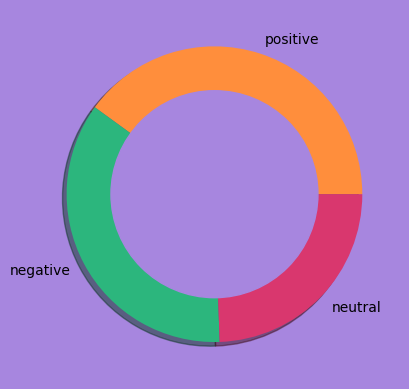

In [13]:
# create data for Pie Chart
fig = plt.figure()
fig.patch.set_facecolor('#a786df')

pichart = count_values_in_column(tw_list,"sentiment")
names= pichart.index
size=pichart["Percentage"]
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color="#a786df")
plt.pie(size, labels=names, colors=["#ff8e3c","#2cb67d","#d9376e"], shadow=True)
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [20]:
def create_wordcloud(text):
    mask = np.array(Image.open("cloud.png"))
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color="#ffc107",
                  mask = mask,
                  max_words=3000,
                  stopwords=stopwords,
                  repeat=True,
                  )
    wc.generate(str(text))
    wc.to_file("wc.png")
    print("Word Cloud Saved Successfully")
    path="wc.png"
    display(Image.open(path))

Word Cloud Saved Successfully


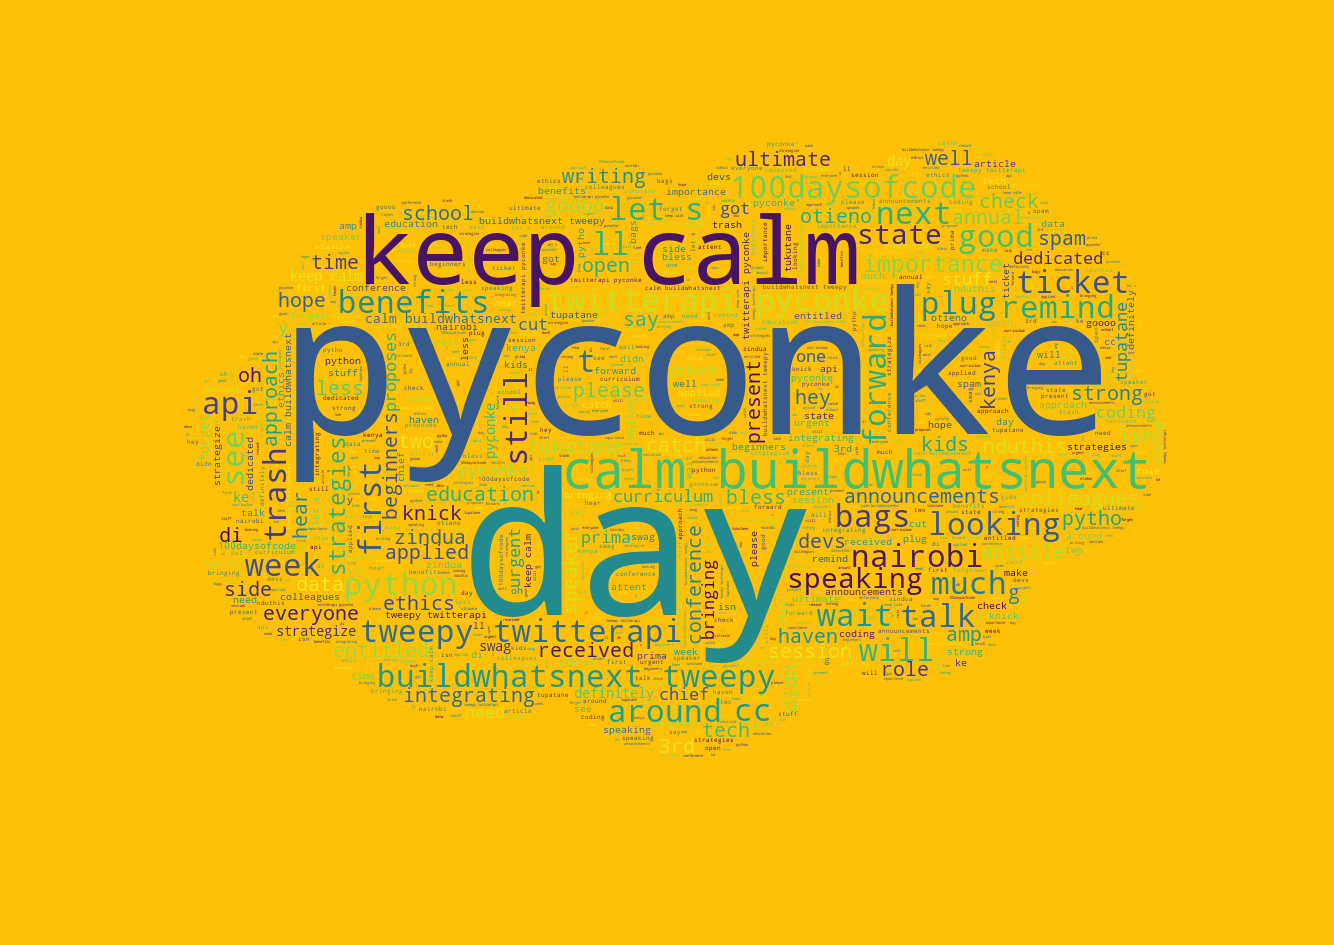

In [21]:
#Creating wordcloud for all tweets
create_wordcloud(tw_list["text"].values)